In [ ]:
# Instalar o pacote readxl (se necessário)
install.packages("readxl")

# Carregar o pacote readxl
library(readxl)




Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [ ]:
install.packages("dplyr")
library(dplyr)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union




In [ ]:
file_path <- "pesquisa.xlsx"


In [ ]:
df <- read_excel(file_path)


In [ ]:
print (df)

# A tibble: 457 × 8
   TURMA DIA           HORÁRIO           CAMPUS   DISCIPLINA PERÍODO SEXO  PESQ1
   <chr> <chr>         <chr>             <chr>    <chr>      <chr>   <chr> <chr>
 1 T123  Segunda-Feira 3º Tempo da Noite Rio Com… PROC_EST   5P      Masc… Não …
 2 T123  Segunda-Feira 3º Tempo da Noite Rio Com… PROC_EST   5P      Masc… Não …
 3 T123  Segunda-Feira 3º Tempo da Noite Rio Com… PROC_EST   5P      Masc… Não …
 4 T123  Segunda-Feira 3º Tempo da Noite Rio Com… PROC_EST   5P      Masc… Não …
 5 T123  Segunda-Feira 3º Tempo da Noite Rio Com… PROC_EST   5P      Femi… R    
 6 T123  Segunda-Feira 3º Tempo da Noite Rio Com… PROC_EST   5P      Femi… R    
 7 T123  Segunda-Feira 3º Tempo da Noite Rio Com… PROC_EST   5P      Femi… R    
 8 T123  Segunda-Feira 3º Tempo da Noite Rio Com… PROC_EST   5P      Masc… Não …
 9 T123  Segunda-Feira 3º Tempo da Noite Rio Com… PROC_EST   5P      Femi… H    
10 T123  Segunda-Feira 3º Tempo da Noite Rio Com… PROC_EST   5P      Masc… R    
# ℹ 447 

In [ ]:
install.packages("ggplot2")
library(ggplot2)


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [ ]:
head (df)

TURMA,DIA,HORÁRIO,CAMPUS,DISCIPLINA,PERÍODO,SEXO,PESQ1
<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
T123,Segunda-Feira,3º Tempo da Noite,Rio Comprido,PROC_EST,5P,Masculino,Não respondido
T123,Segunda-Feira,3º Tempo da Noite,Rio Comprido,PROC_EST,5P,Masculino,Não respondido
T123,Segunda-Feira,3º Tempo da Noite,Rio Comprido,PROC_EST,5P,Masculino,Não respondido
T123,Segunda-Feira,3º Tempo da Noite,Rio Comprido,PROC_EST,5P,Masculino,Não respondido
T123,Segunda-Feira,3º Tempo da Noite,Rio Comprido,PROC_EST,5P,Feminino,R
T123,Segunda-Feira,3º Tempo da Noite,Rio Comprido,PROC_EST,5P,Feminino,R


In [ ]:
sexo_counts <- df %>%
  count(SEXO) %>%
  mutate(percentage = n / sum(n) * 100)

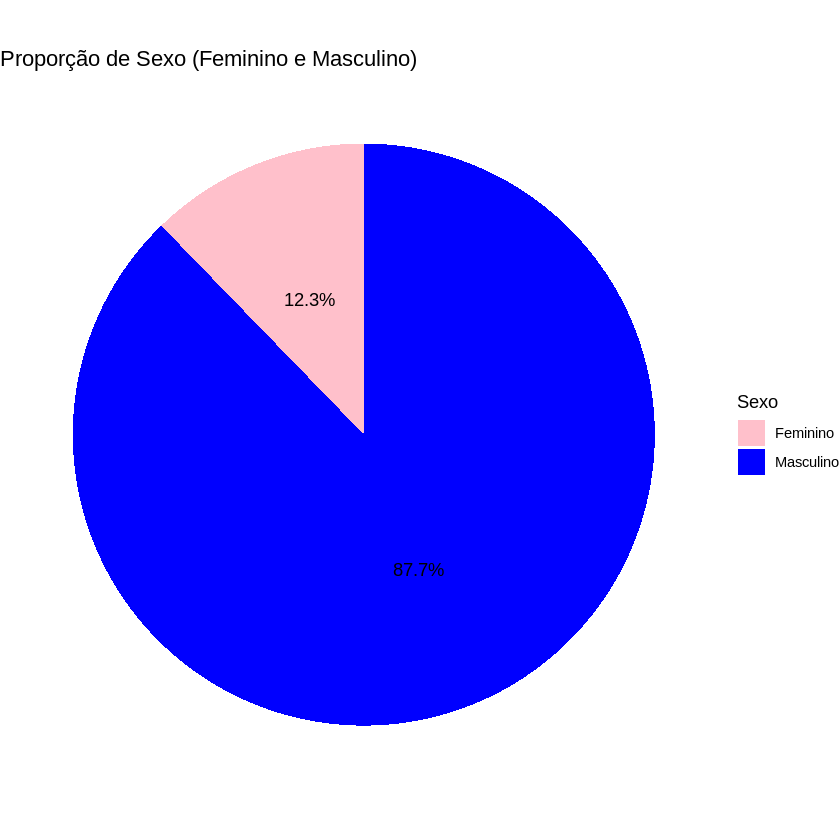

In [ ]:
ggplot(sexo_counts, aes(x = "", y = percentage, fill = SEXO)) +
  geom_bar(stat = "identity", width = 1) +
  coord_polar(theta = "y") +
  scale_fill_manual(values = c("Feminino" = "pink", "Masculino" = "blue")) +
  labs(title = "Proporção de Sexo (Feminino e Masculino)", fill = "Sexo") +
  theme_void() +
  geom_text(aes(label = paste0(round(percentage, 1), "%")),
            position = position_stack(vjust = 0.5))

In [ ]:
pesq1_counts <- df %>%
  count(PESQ1) %>%
  mutate(Percentagem = n / sum(n) * 100)

pesq1_counts <- pesq1_counts %>%
  arrange(desc(n))

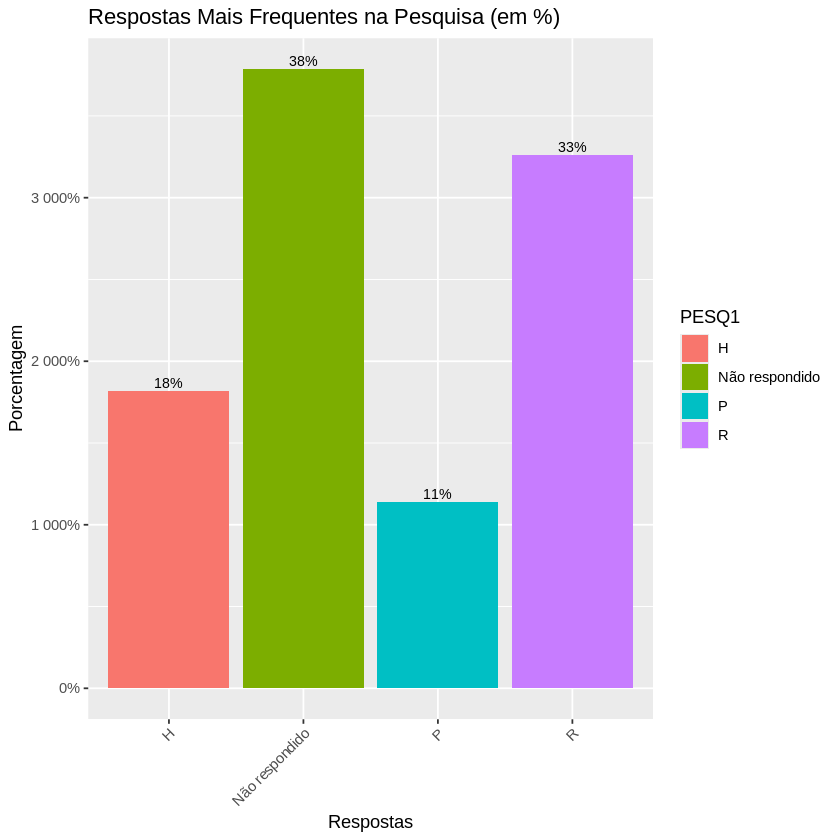

In [ ]:
ggplot(pesq1_counts, aes(x = PESQ1, y = Percentagem, fill = PESQ1)) +
  geom_bar(stat = "identity") +
  labs(title = "Respostas Mais Frequentes na Pesquisa (em %)", x = "Respostas", y = "Porcentagem") +
  scale_y_continuous(labels = scales::percent_format(accuracy = 1)) +
  theme(axis.text.x = element_text(angle = 45, hjust = 1)) +
  geom_text(aes(label = paste0(round(Percentagem), "%")), vjust = -0.3, size = 3)

In [ ]:
df_filtered <- df %>%
  filter(PESQ1 != "Não respondido")

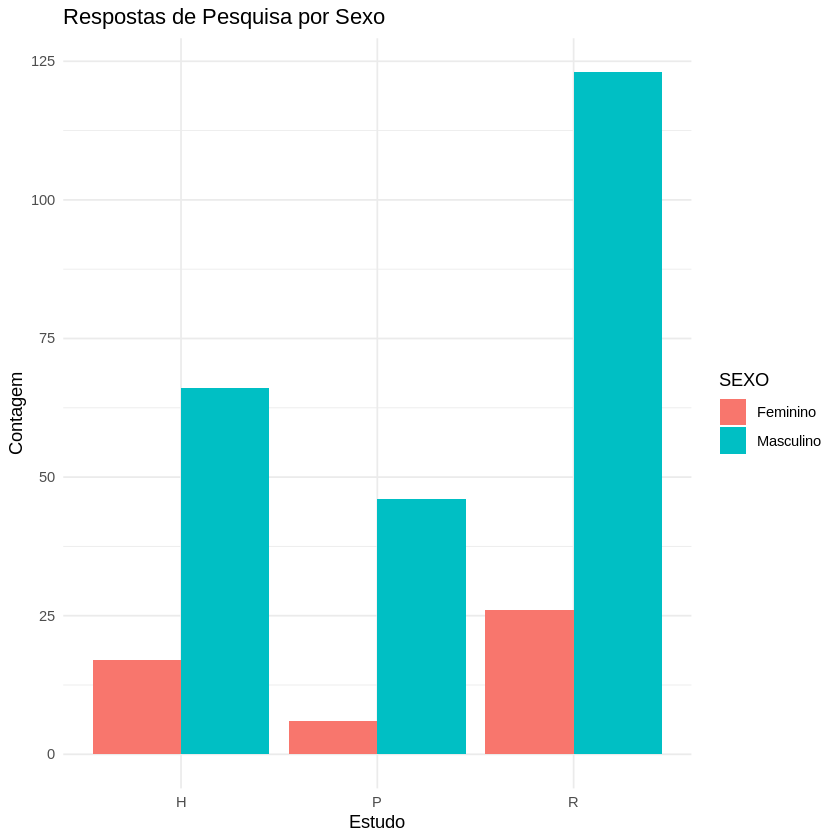

In [ ]:
ggplot(df_filtered, aes(x = PESQ1, fill = SEXO)) +
  geom_bar(position = "dodge") +
  labs(title = "Respostas de Pesquisa por Sexo", x = "Estudo", y = "Contagem") +
  theme_minimal()

In [ ]:
df_filtered <- df %>%
  filter(PESQ1 != "Não respondido")

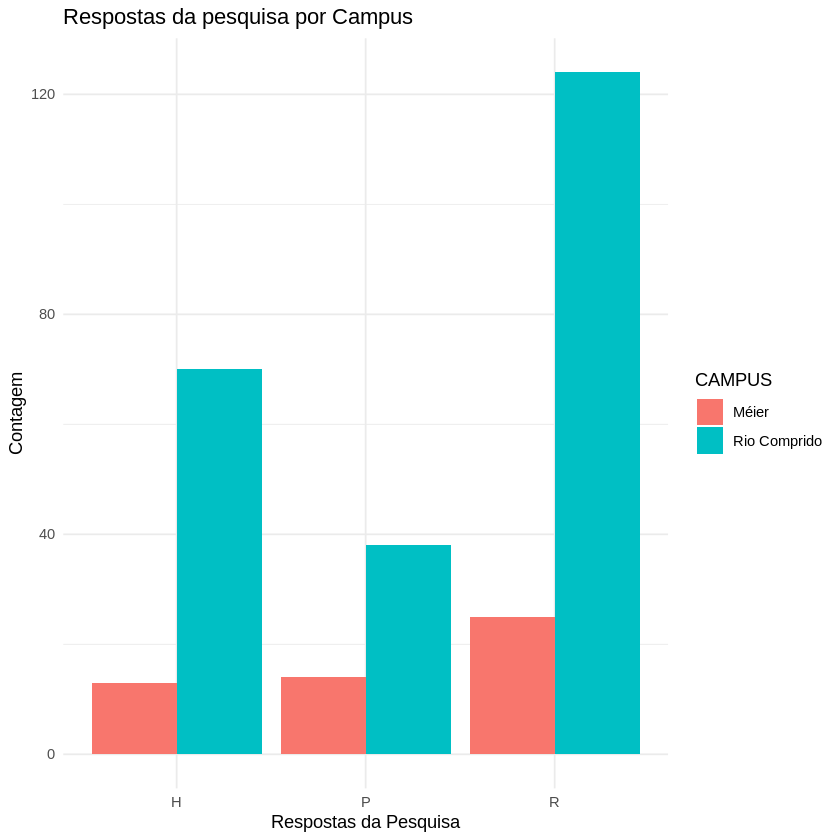

In [ ]:
ggplot(df_filtered, aes(x = PESQ1, fill = CAMPUS)) +
  geom_bar(position = "dodge") +
  labs(title = "Respostas da pesquisa por Campus", x = "Respostas da Pesquisa", y = "Contagem") +
  theme_minimal()

In [ ]:
df_filtered <- df %>%
  filter(PESQ1 != "Não respondido")

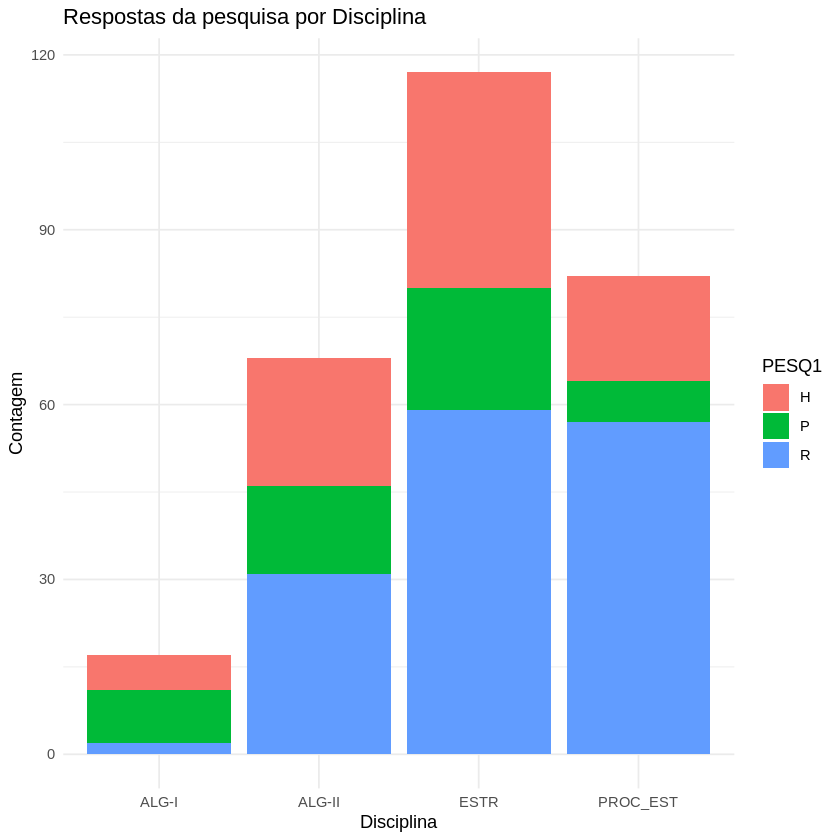

In [ ]:
ggplot(df_filtered, aes(x = DISCIPLINA, fill = PESQ1)) +
  geom_bar() +
  labs(title = "Respostas da pesquisa por Disciplina", x = "Disciplina", y = "Contagem") +
  theme_minimal()

In [ ]:
df_filtered <- df %>%
  filter(PESQ1 != "Não respondido")

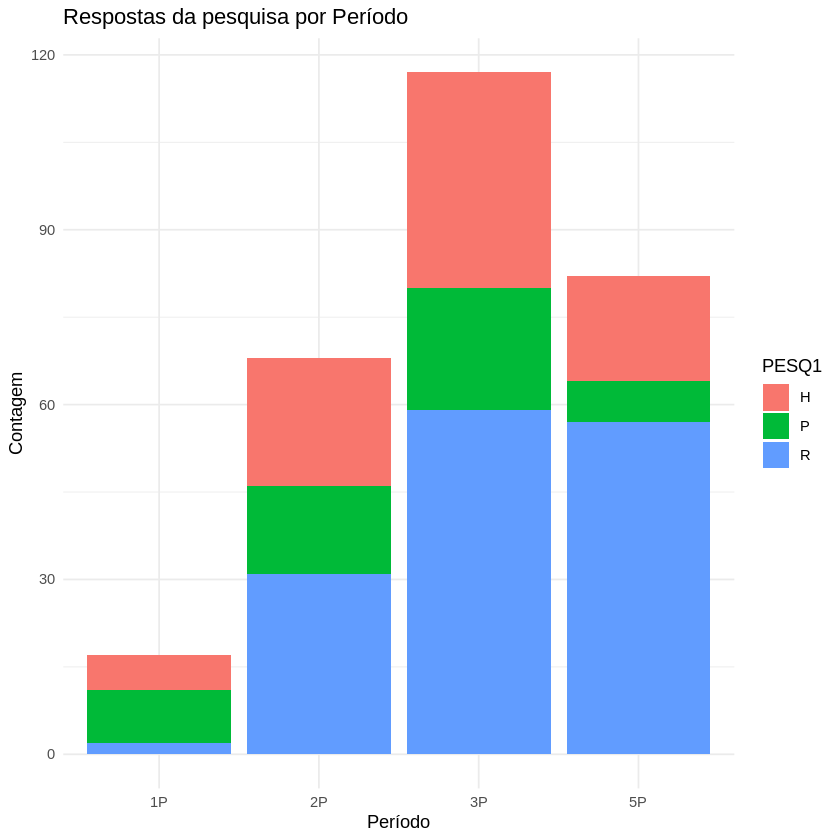

In [ ]:
ggplot(df_filtered, aes(x = PERÍODO, fill = PESQ1)) +
  geom_bar() +
  labs(title = "Respostas da pesquisa por Período", x = "Período", y = "Contagem") +
  theme_minimal()

In [ ]:
df_filtered <- df %>%
  filter(PESQ1 != "Não respondido")

In [ ]:
df_filtered$DIA <- factor(df_filtered$DIA, levels = c("Segunda-Feira", "Terça-Feira", "Quarta-Feira", "Sexta-Feira"))

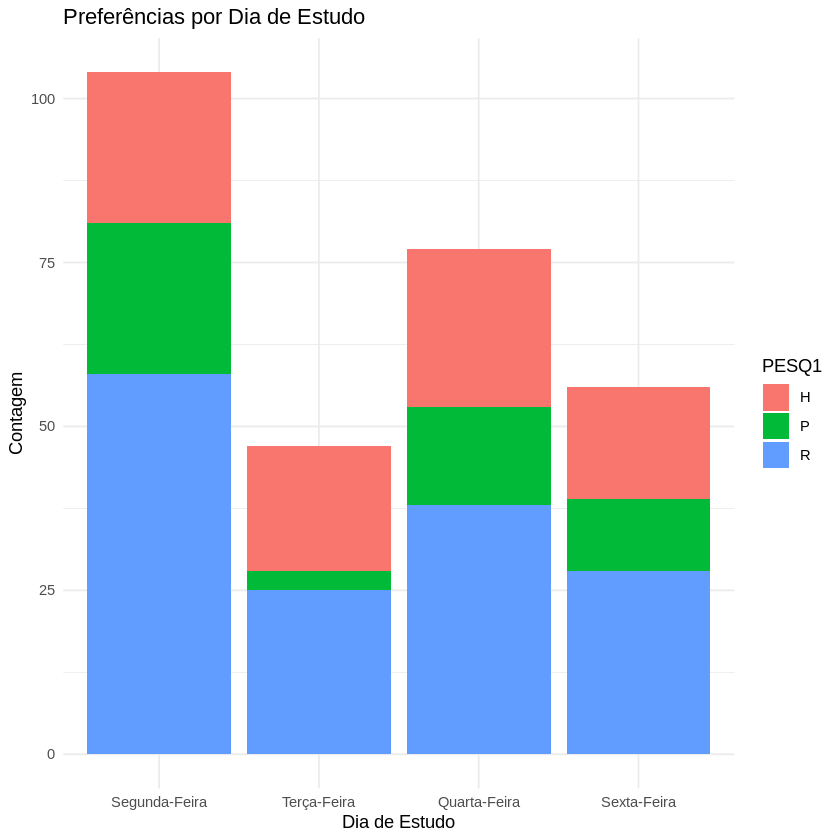

In [ ]:
ggplot(df_filtered, aes(x = DIA, fill = PESQ1)) +
  geom_bar(position = "stack") +
  labs(title = "Preferências por Dia de Estudo", x = "Dia de Estudo", y = "Contagem") +
  theme_minimal()